# **1. Install and Import packages and dataset**


In [35]:
#1. Install and import packages and load dataset
'''
pip install langdetect
pip install vaderSentiment
pip install networkx
'''


import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect, LangDetectException  
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import networkx as nx  
from scipy.stats import pearsonr  

nltk.download('stopwords')
nltk.download('punkt')

try:
    df = pd.read_csv('Ukraine_war.csv')
    print("Datei erfolgreich geladen.")
except PermissionError:
    print("Zugriff auf die Datei verweigert. Bitte prüfen, ob sie geöffnet ist oder ob Zugriffsrechte fehlen.")
except FileNotFoundError:
    print(" Datei nicht gefunden. Bitte Pfad überprüfen.")
except Exception as e:
    print(f" Unerwarteter Fehler: {e}")


Zugriff auf die Datei verweigert. Bitte prüfen, ob sie geöffnet ist oder ob Zugriffsrechte fehlen.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tisse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tisse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
df2=pd.read_csv('uber-raw-data-apr14.csv')
print("Datei erfolgreich geladen.")
df2
df2.info()

Datei erfolgreich geladen.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [17]:
import os

if os.access(file_path, os.R_OK):
    print("The file is accessible for reading.")
else:
    print("The file is not accessible. Check permissions or if it is open elsewhere.")

The file is accessible for reading.


In [32]:
import os
print(os.path.exists('Ukraine_war.csv'))  # Gibt True oder False zurück


True


In [30]:
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())


Aktuelles Arbeitsverzeichnis: C:\CODING\Python


In [22]:
os.chdir('C:/CODING/Python')



In [31]:
import os
print("Ist Datei:", os.path.isfile('Ukraine_war.csv'))


Ist Datei: False


# 2. **Preprocessing**

In [ ]:
## Alle @-Erwaähnung aus einem Tweet wird in mentions gespeichert

import re
# Konvertiere alle Einträge in der Spalte 'text' zu Strings
df['content'] = df['content'].astype(str)
def extract_mentions(text):
    # Extrahiert alle @-Erwähnungen aus einem Text
    mentions = re.findall(r'@\w+', text)
    return mentions

# Füge eine neue Spalte 'mentions' hinzu
df['mentions'] = df['content'].apply(extract_mentions)

# Vorschau der neuen Spalte
print(df[['content', 'mentions']])

                                                 content  \
0      There was an anti war protest for #Ukraine as ...   
1      https://t.co/Z1pURKlNHu NATO followed USA into...   
2      @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   
3      @nytimes This war could have been avoided by e...   
4      @ggreenwald Remember the biggest mistake made ...   
...                                                  ...   
39995  Ukraine War: Understanding Russian President V...   
39996  Q&amp;A’s on: was Russia right to be threatene...   
39997  @NikkiHaley Democrats now want to finance Hunt...   
39998  1/4 As we are gutted and praying for the Peopl...   
39999  Heartbreaking. Making Molotov cocktails, linin...   

                                                mentions  
0                                                     []  
1                                                     []  
2      [@mfa_russia, @RusEmbUSA, @RussiaUN, @MFA_Ukra...  
3                                          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _type             40000 non-null  object 
 1   url               40000 non-null  object 
 2   date              40000 non-null  object 
 3   content           40000 non-null  object 
 4   renderedContent   40000 non-null  object 
 5   id                40000 non-null  int64  
 6   user              40000 non-null  object 
 7   replyCount        40000 non-null  int64  
 8   retweetCount      40000 non-null  int64  
 9   likeCount         40000 non-null  int64  
 10  quoteCount        40000 non-null  int64  
 11  conversationId    40000 non-null  int64  
 12  lang              40000 non-null  object 
 13  source            40000 non-null  object 
 14  sourceUrl         40000 non-null  object 
 15  sourceLabel       40000 non-null  object 
 16  outlinks          14559 non-null  object

# **3. Sentiment Analysis**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Sicherstellen, dass das vader_lexicon heruntergeladen ist
nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialisieren
sia = SentimentIntensityAnalyzer()

# Anzahl der Tweets vor der Sentimentanalyse
print("Anzahl der Tweets vor der Sentimentanalyse:", len(df))

# Sentimentanalyse auf die 'content' Spalte anwenden
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x) if pd.notnull(x) else None)

# Überprüfen, ob die Sentimentanalyse funktioniert hat
print("Anzahl der Tweets nach der Sentimentanalyse:", len(df))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Anzahl der Tweets vor der Sentimentanalyse: 40000
Anzahl der Tweets nach der Sentimentanalyse: 40000


In [ ]:
df.sentiment

,sentiment
0,"{'neg': 0.152, 'neu': 0.635, 'pos': 0.213, 'co..."
1,"{'neg': 0.226, 'neu': 0.716, 'pos': 0.059, 'co..."
2,"{'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compou..."
3,"{'neg': 0.352, 'neu': 0.558, 'pos': 0.09, 'com..."
4,"{'neg': 0.215, 'neu': 0.738, 'pos': 0.047, 'co..."
...,...
39995,"{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp..."
39996,"{'neg': 0.165, 'neu': 0.723, 'pos': 0.112, 'co..."
39997,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp..."
39998,"{'neg': 0.065, 'neu': 0.763, 'pos': 0.172, 'co..."


In [ ]:
# Sentiment-Scores in separate Spalten aufteilen
df[['neg', 'neu', 'pos', 'compound']] = df['sentiment'].apply(pd.Series)

# Sentiment-Kategorie basierend auf compound-Wert zuweisen
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['compound'].apply(categorize_sentiment)


📊 Verteilung der Sentiment-Kategorien:
sentiment_category
negative    31797
positive     5399
neutral      2804
Name: count, dtype: int64

📈 Statistiken des compound-Scores:
count    40000.000000
mean        -0.471046
std          0.466669
min         -0.995000
25%         -0.822500
50%         -0.599400
75%         -0.249950
max          0.986400
Name: compound, dtype: float64


<ipython-input-45-65566e29bbc2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_category", order=["positive", "neutral", "negative"], palette="coolwarm")


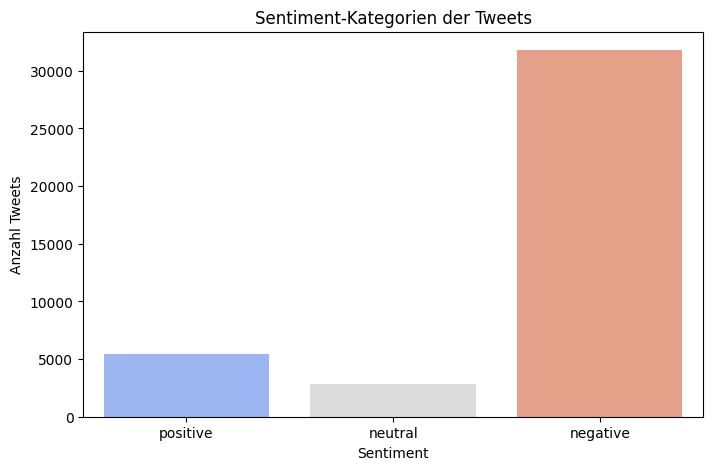

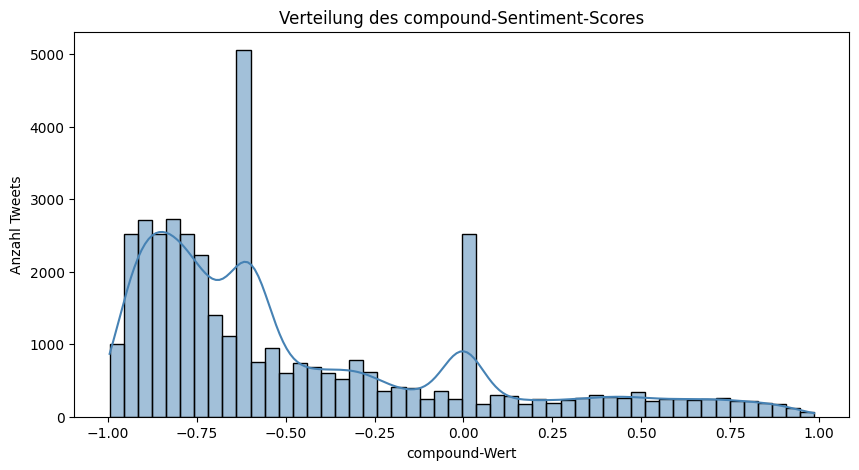

In [ ]:
#Visualisieurng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Übersicht ---
print("📊 Verteilung der Sentiment-Kategorien:")
print(df["sentiment_category"].value_counts())

print("\n📈 Statistiken des compound-Scores:")
print(df["compound"].describe())

# --- Visualisierung ---

# Balkendiagramm der Sentiment-Kategorien
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment_category", order=["positive", "neutral", "negative"], palette="coolwarm")
plt.title("Sentiment-Kategorien der Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Anzahl Tweets")
plt.show()

# Histogramm des compound-Werts
plt.figure(figsize=(10, 5))
sns.histplot(df["compound"], bins=50, kde=True, color='steelblue')
plt.title("Verteilung des compound-Sentiment-Scores")
plt.xlabel("compound-Wert")
plt.ylabel("Anzahl Tweets")
plt.show()


# 4. Network Analysis

In [ ]:
# Network Analysis execution.
# Note: with such a large dataset it takes time to execute this code useing Google Colab (Cloud computing)

import networkx as nx


# Erstelle ein gerichtetes Netzwerk
G = nx.DiGraph()

# Füge die Kanten zum Netzwerk hinzu
G.add_edges_from(edges)

# Berechne Netzwerkmetriken
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Beispielhafte Ausgabe der Top 10 Knoten mit höchster Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_10_betweenness = sorted(betweenness_centrality.items(), key = lambda x: x[1], reverse=True)[:20]
top_10_closeness=sorted(closeness_centrality.items(), key= lambda x:[1], reverse=True ) [:20]
print("Top 10 Knoten mit höchster Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"{node}: {centrality}")

print("Top 10 Knoten mit Betweeness Centrality: ")
for node, betweenness in top_10_betweenness:
  print(f"{node}: {centrality}")

Top 10 Knoten mit höchster Degree Centrality:
ZelenskyyUa: 0.01169811320754717
YouTube: 0.011590296495956873
POTUS: 0.01123989218328841
Ukraine: 0.01105121293800539
KremlinRussia_E: 0.006954177897574124
NATO: 0.006954177897574124
KyivIndependent: 0.00646900269541779
mfa_russia: 0.004824797843665768
Reuters: 0.004177897574123989
BorisJohnson: 0.00398921832884097
MFA_Ukraine: 0.003962264150943396
FoxNews: 0.003315363881401617
CNN: 0.003126684636118598
RF_OSCE: 0.002991913746630728
nytimes: 0.002991913746630728
JoeBiden: 0.0029649595687331535
RusEmbUSA: 0.002884097035040431
elonmusk: 0.002884097035040431
nexta_tv: 0.0027762803234501346
RussiaUN: 0.0027493261455525607
Top 10 Knoten mit Betweeness Centrality: 
{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _type               40000 non-null  object 
 1   url                 40000 non-null  object 
 2   date                40000 non-null  object 
 3   content             40000 non-null  object 
 4   renderedContent     40000 non-null  object 
 5   id                  40000 non-null  int64  
 6   user                40000 non-null  object 
 7   replyCount          40000 non-null  int64  
 8   retweetCount        40000 non-null  int64  
 9   likeCount           40000 non-null  int64  
 10  quoteCount          40000 non-null  int64  
 11  conversationId      40000 non-null  int64  
 12  lang                40000 non-null  object 
 13  source              40000 non-null  object 
 14  sourceUrl           40000 non-null  object 
 15  sourceLabel         40000 non-null  object 
 16  outl


5. Pearson Correlation

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


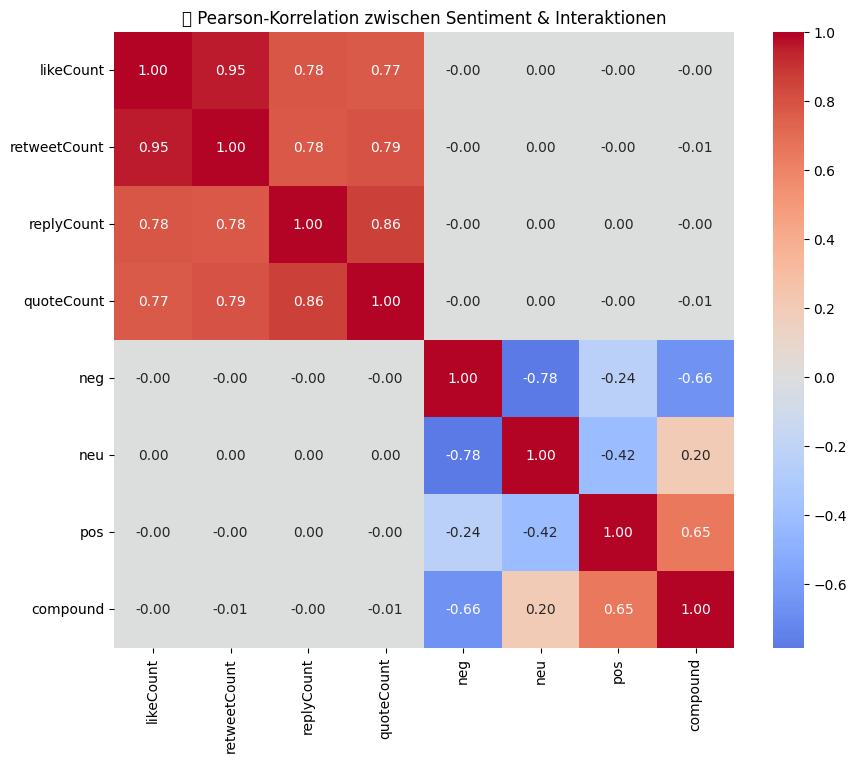

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevante Spalten extrahieren
cols_of_interest = ['likeCount', 'retweetCount', 'replyCount', 'quoteCount',
                    'neg', 'neu', 'pos', 'compound']

# Korrelation berechnen (nur numerische Spalten)
correlation_matrix = df[cols_of_interest].corr(method='pearson')

# Heatmap darstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("📊 Pearson-Korrelation zwischen Sentiment & Interaktionen")
plt.show()


#**6. Analysis of the Presidents Sentiment.**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-4-2b2f8c077bdc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zelenskyy['sentiment'] = df_zelenskyy['content'].apply(lambda text: sia.polarity_scores(text))
<ipython-input-4-2b2f8c077bdc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kremlin['sentiment'] = df_kremlin['content'].apply(lambda text: sia.polarity_scores(text))
<ipython-input-4-2b2f8c077bdc>:

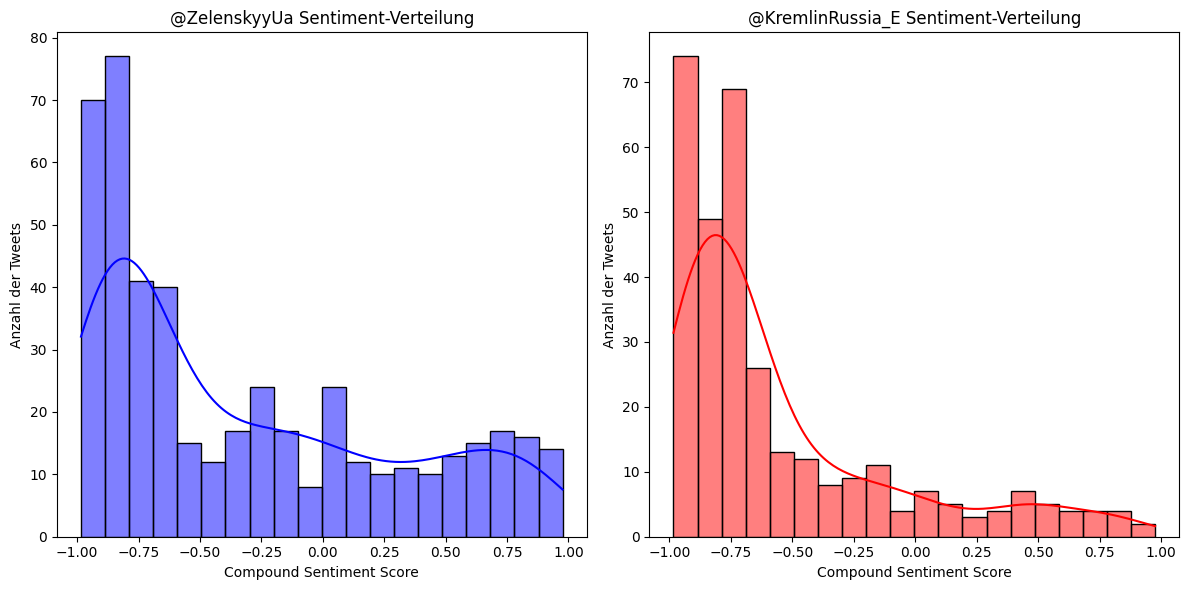

@ZelenskyyUa:
Durchschnittliches Sentiment: -0.31659416846652266
Standardabweichung des Sentiments: 0.5976859877067427
Positive Tweets: 126
Negative Tweets: 321
Neutrale Tweets: 16

@KremlinRussia_E:
Durchschnittliches Sentiment: -0.5530865625000001
Standardabweichung des Sentiments: 0.46577530118950905
Positive Tweets: 41
Negative Tweets: 275
Neutrale Tweets: 4


In [ ]:
#6. Analysis of important actors such as the Presidents.
# Visualisation of the results

import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

# Sicherstellen, dass das vader_lexicon heruntergeladen ist
nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialisieren
sia = SentimentIntensityAnalyzer()

# Filterung der Tweets, die @ZelenskyyUa und @KremlinRussia_E erwähnen
df_zelenskyy = df[df['content'].apply(lambda mentions: '@ZelenskyyUa' in mentions)]
df_kremlin = df[df['content'].apply(lambda mentions: '@KremlinRussia_E' in mentions)]

# Durchführung der Sentimentanalyse auf die gefilterten Tweets
df_zelenskyy['sentiment'] = df_zelenskyy['content'].apply(lambda text: sia.polarity_scores(text))
df_kremlin['sentiment'] = df_kremlin['content'].apply(lambda text: sia.polarity_scores(text))

# Extrahiere den compound-Wert für eine einfachere Analyse
df_zelenskyy['compound'] = df_zelenskyy['sentiment'].apply(lambda score_dict: score_dict['compound'])
df_kremlin['compound'] = df_kremlin['sentiment'].apply(lambda score_dict: score_dict['compound'])

# Verteilung der Sentiments visualisieren
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# ZelenskyyUa Sentiment Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_zelenskyy['compound'], bins=20, kde=True, color='blue')
plt.title('@ZelenskyyUa Sentiment-Verteilung')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Anzahl der Tweets')

# KremlinRussia_E Sentiment Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_kremlin['compound'], bins=20, kde=True, color='red')
plt.title('@KremlinRussia_E Sentiment-Verteilung')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Anzahl der Tweets')

plt.tight_layout()
plt.show()


# Durchschnittliches Sentiment berechnen
avg_sentiment_zelenskyy = df_zelenskyy['compound'].mean()
avg_sentiment_kremlin = df_kremlin['compound'].mean()

# Standardabweichung des Sentiments berechnen
std_sentiment_zelenskyy = df_zelenskyy['compound'].std()
std_sentiment_kremlin = df_kremlin['compound'].std()

# Anzahl der positiven, negativen und neutralen Tweets
positive_tweets_zelenskyy = df_zelenskyy[df_zelenskyy['compound'] > 0].shape[0]
negative_tweets_zelenskyy = df_zelenskyy[df_zelenskyy['compound'] < 0].shape[0]
neutral_tweets_zelenskyy = df_zelenskyy[df_zelenskyy['compound'] == 0].shape[0]

positive_tweets_kremlin = df_kremlin[df_kremlin['compound'] > 0].shape[0]
negative_tweets_kremlin = df_kremlin[df_kremlin['compound'] < 0].shape[0]
neutral_tweets_kremlin = df_kremlin[df_kremlin['compound'] == 0].shape[0]

# Ergebnisse ausgeben
print(f"@ZelenskyyUa:")
print(f"Durchschnittliches Sentiment: {avg_sentiment_zelenskyy}")
print(f"Standardabweichung des Sentiments: {std_sentiment_zelenskyy}")
print(f"Positive Tweets: {positive_tweets_zelenskyy}")
print(f"Negative Tweets: {negative_tweets_zelenskyy}")
print(f"Neutrale Tweets: {neutral_tweets_zelenskyy}\n")

print(f"@KremlinRussia_E:")
print(f"Durchschnittliches Sentiment: {avg_sentiment_kremlin}")
print(f"Standardabweichung des Sentiments: {std_sentiment_kremlin}")
print(f"Positive Tweets: {positive_tweets_kremlin}")
print(f"Negative Tweets: {negative_tweets_kremlin}")
print(f"Neutrale Tweets: {neutral_tweets_kremlin}")